In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib as mpl
import os

from IPython.core.pylabtools import figsize
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

In [2]:
#Getting Working Directory
os.getcwd()

#Setting style and font size for graphs
sns.set_style("whitegrid")
mpl.rcParams['font.size'] = 13

In [3]:
#load original data into dataframe
file ='D:\\Abhishek\\Personal\\Springboard\\music_recom\\train_final.csv'

df = pd.read_csv(file)
df.shape

(7377418, 73)

In [4]:
# Converting IDs to Object class
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 73 columns):
msno                    object
song_id                 object
source_system_tab       object
source_screen_name      object
source_type             object
target                  int64
song_length             float64
genre_ids               object
artist_name             object
composer                object
lyricist                object
language                int64
city                    int64
bd                      int64
registered_via          int64
lyricist_count          int64
artist_count            int64
composer_count          int64
genre_count             int64
isrc_country            object
isrc_year               int64
song_freq               int64
artist_freq             int64
count_song_played       int64
count_artist_played     int64
duration                int64
registration_year       int64
expiration_year         int64
expiration_month        int64
age_o

In [5]:
drop_col = ['msno','song_id','genre_ids', 'composer', 'artist_name', 'lyricist', 'isrc_country']
df.drop(drop_col, axis=1, inplace = True)

# Converting to categories
cat_names = list(df.select_dtypes(include='object').columns)
df[cat_names] = df[cat_names].astype('category')

# Converting int64 to int32 type
int32 = ['count_artist_played', 'count_song_played']
df[int32] = df[int32].astype('int32')

int8 = ['language','bd','city', 'genre_count', 'lyricist_count','composer_count','artist_count','registered_via']
df[int8] = df[int8].astype('int8')

# Converting int64 to int16 type
int64 = list(df.select_dtypes(include='int64').columns)
df[int64] = df[int64].astype('int16')

# Converting float64 to float32 and float16 type
float_names = list(df.select_dtypes(include='float64').columns)
float_names.remove('song_length')
df[float_names] = df[float_names].astype('float16')
df['song_length'] = df['song_length'].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 66 columns):
source_system_tab       category
source_screen_name      category
source_type             category
target                  int16
song_length             float32
language                int8
city                    int8
bd                      int8
registered_via          int8
lyricist_count          int8
artist_count            int8
composer_count          int8
genre_count             int8
isrc_year               int16
song_freq               int16
artist_freq             int16
count_song_played       int32
count_artist_played     int32
duration                int16
registration_year       int16
expiration_year         int16
expiration_month        int16
age_of_song             int16
song_type               category
genre_ids_encoded       float16
composer_encoded        float16
artist_name_encoded     float16
lyricist_encoded        float16
isrc_country_encoded    float16
u

In [6]:
# Separating Numeric and Non_numeric Data
numeric = df.select_dtypes(exclude = 'category')
categorical = df.select_dtypes(include = 'category')

#Creating Dummy variables for Categorical Data using One Hot Encoding
dummies = pd.get_dummies(categorical,drop_first = True)

In [7]:
#numeric.skew()

In [8]:
#Creating our Feature and Target Data Set: X, y respectively
X = pd.concat([numeric,dummies],axis=1).drop('target', axis = 1)
y = df.target

#Splitting Data into Training and Test Data Set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 288797 to 6413414
Columns: 102 entries, song_length to song_type_short
dtypes: float16(42), float32(1), int16(8), int32(2), int8(8), uint8(41)
memory usage: 594.5 MB


There are two types of error, False Positive and False Negative. Predicting that a song will not be listened again but actually song gets listened again. This is false negative. Predicting that a song will be listened again but in actually song is not listened again is called false positive. For us both type of error are important

## Normalization

In [10]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)


### Random Forest Classifier

In [11]:
# Base Line Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support,log_loss
class_names = ['Not Listened', 'Listened']

In [12]:
def auc_curve(y_test,y_pred_test,auc_test):
    fpr,tpr, threshold = roc_curve(y_test, y_pred_test)
    _ = plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' %auc_test )
    _ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    _ = plt.xlim([0.0, 1.0])
    _ = plt.ylim([0.0, 1.05])
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic example')
    _ = plt.legend(loc="lower right")


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  5.6min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 23.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   51.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   51.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   51.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   51.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Paral

Training accuracy: 0.7249


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   51.2s finished


Test accuracy    : 0.7099
Training AUC Score: 0.8050
Testing AUC Score: 0.7856
Classification Report - Training
              precision    recall  f1-score   support

           0       0.72      0.73      0.73   1830920
           1       0.73      0.72      0.72   1857789

    accuracy                           0.72   3688709
   macro avg       0.73      0.72      0.72   3688709
weighted avg       0.73      0.72      0.72   3688709

Classification Report - Testing
              precision    recall  f1-score   support

Not Listened       0.70      0.72      0.71   1831842
    Listened       0.72      0.70      0.71   1856867

    accuracy                           0.71   3688709
   macro avg       0.71      0.71      0.71   3688709
weighted avg       0.71      0.71      0.71   3688709



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   50.5s finished


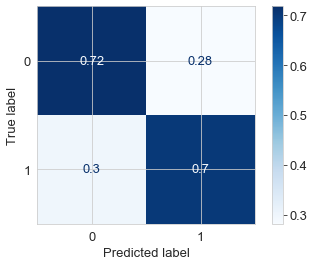

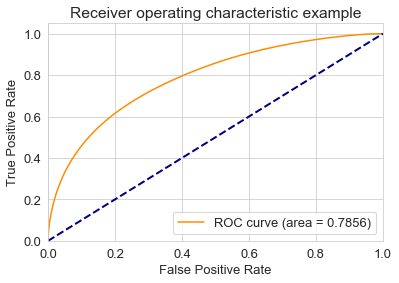

In [13]:
# Base Line Evaluation
rf = RandomForestClassifier(max_depth = 15, random_state = 42, n_jobs = 4, verbose = 3)

rf.fit(X_train_norm,y_train)

#Predicting for testing and trainig data sets
y_test_proba = rf.predict_proba(X_test_norm)[:,1]
y_train_proba = rf.predict_proba(X_train_norm)[:,1]

y_pred_test = rf.predict(X_test_norm)
y_pred_train = rf.predict(X_train_norm)

#Accuracy Score
print("Training accuracy: %0.4f" %rf.score(X_train_norm, y_train))
print("Test accuracy    : %0.4f" %rf.score(X_test_norm, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(rf, X_test_norm, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)


Top 20 Feature Importance


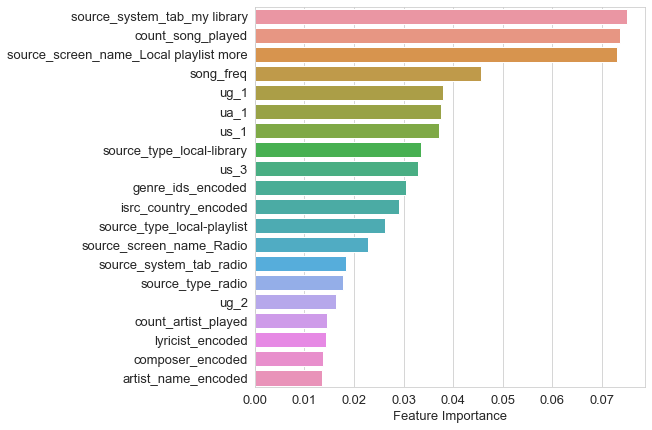

In [14]:
figsize(7,7)
import seaborn as sns
coefficients = rf.feature_importances_
coef = pd.DataFrame(coefficients, index = X_train.columns, columns = ['Feature Importance'])
coef.sort_values('Feature Importance', ascending = False, inplace = True)
print("Top 20 Feature Importance")
_ = sns.barplot(data = coef[:20], x = 'Feature Importance', y = coef[:20].index, orient = 'h')
#_ = plt.barh(coef[:20].index, coef['Feature Importance'][:20])